# <font color=blue>Assignments for "Performance Measurement Metrics"</font>

In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Evaluate the performance of your model with the metrics you have learned in this course.
- Plot the ROC and the precision / recall curves for different "c" values.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
titanic_df = pd.read_csv("titanic.csv")

#Filling age column by using median.
titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.median())
#Dropping column with many empty values
titanic_df = titanic_df.drop("Cabin",axis=1)

titanic_df = pd.concat([titanic_df, pd.get_dummies(titanic_df.Sex, drop_first=True)], axis=1)

#Creating X and y variable to use in our model.
y = titanic_df.Survived
X = titanic_df[['Pclass', 'male', 'Age', 'SibSp','Parch', 'Fare']]

#Splitting data to train and tes sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
#Creating a logistic regression object
logreg = LogisticRegression(solver='lbfgs', multi_class="multinomial")

logreg.fit(X_train, y_train)


LogisticRegression(multi_class='multinomial')

In [27]:
#Importing mterics from sklearn to anaylze model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [28]:
#Predicting survivors by using logistic regression model.
train_prediction = logreg.predict(X_train)
test_prediction = logreg.predict(X_test)

In [29]:
confusion_matrix_train = confusion_matrix(y_train, train_prediction)
confusion_matrix_test = confusion_matrix(y_test, test_prediction)

#### Confusion Matrix

In [30]:
print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[389  55]
 [ 86 182]]

Confusion Matrix (Test Data)
------------------------------
[[92 13]
 [21 53]]


#### Accuracy

In [31]:
print("Accuracy of train is {:.2f} ".format(accuracy_score(y_train, train_prediction)))
print("Accuracy of test is {:.2f} ".format(accuracy_score(y_test, test_prediction)))

Accuracy of train is 0.80 
Accuracy of test is 0.81 


#### Precision

In [32]:
print("Precision of train is {:.2f} ".format(precision_score(y_train, train_prediction)))
print("Precision of test is {:.2f} ".format(precision_score(y_test, test_prediction)))

Precision of train is 0.77 
Precision of test is 0.80 


#### Recall

In [33]:
print("Recall of train is {:.2f} ".format(recall_score(y_train, train_prediction)))
print("Recall of test is {:.2f} ".format(recall_score(y_test, test_prediction)))

Recall of train is 0.68 
Recall of test is 0.72 


#### F1 Score

In [34]:
print("F1 Score of train is {:.2f} ".format(f1_score(y_train, train_prediction)))
print("F1 Score of test is {:.2f} ".format(f1_score(y_test, test_prediction)))

F1 Score of train is 0.72 
F1 Score of test is 0.76 


### ROC / AUC

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

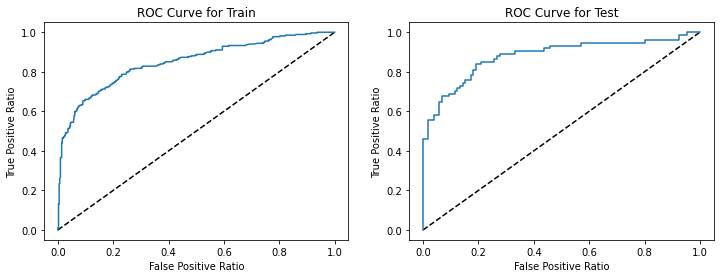

In [40]:
train_prediction_proba = logreg.predict_proba(X_train)[:,1]
test_prediction_proba = logreg.predict_proba(X_test)[:,1]

fpr1, tpr1, thresholds1  = roc_curve(y_train, train_prediction_proba)
fpr2, tpr2, thresholds2 = roc_curve(y_test, test_prediction_proba)

# Plot ROC curve

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve for Train')


plt.subplot(122)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2)
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve for Test')



plt.show()

### Precision Recall Curve

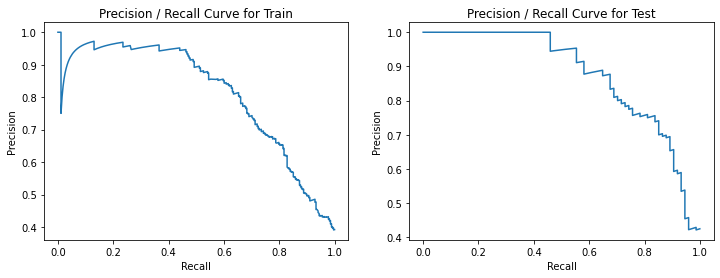

In [42]:
from sklearn.metrics import precision_recall_curve

precision1, recall1, _ = precision_recall_curve(y_train, train_prediction_proba)
precision2, recall2, _ = precision_recall_curve(y_test, test_prediction_proba)


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(recall1, precision1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve for Train')

plt.subplot(122)
plt.plot(recall2, precision2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve for Test')

plt.show()